In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [41]:
df=pd.read_csv("/content/mushroom.csv")

In [42]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [43]:
df.shape

(2000, 26)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [45]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [46]:
df['class'].value_counts()

,count
class,
poisonous,1400
edible,600


<Axes: xlabel='Unnamed: 0', ylabel='class'>

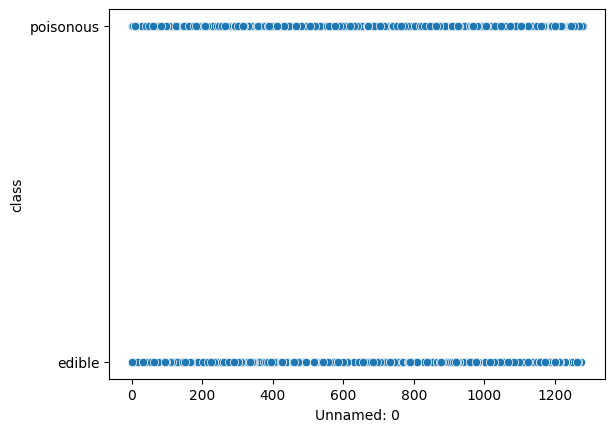

In [47]:
sns.scatterplot(x=df['Unnamed: 0'],y=df['class'])

<Axes: xlabel='stalk_height', ylabel='class'>

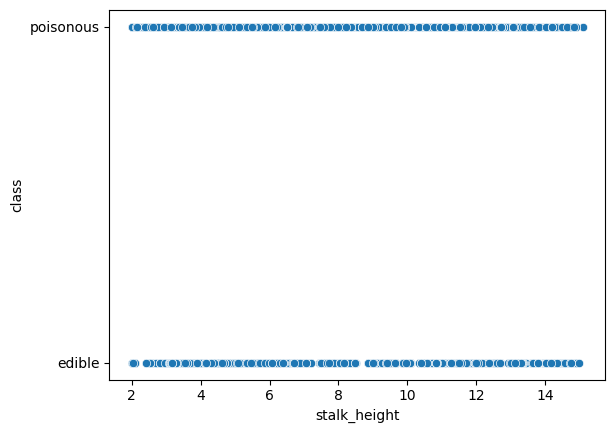

In [48]:
sns.scatterplot(x=df['stalk_height'],y=df['class'])

<Axes: xlabel='odor', ylabel='class'>

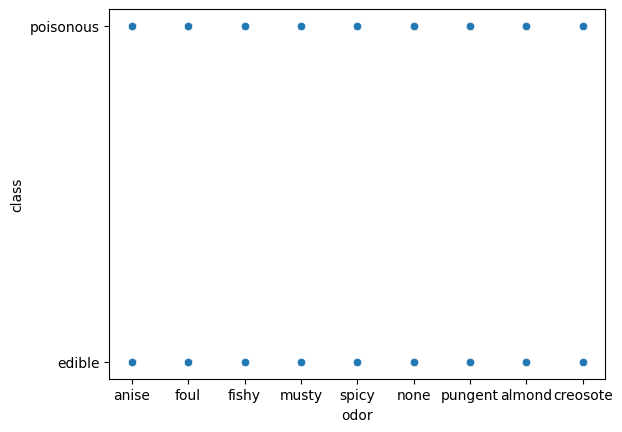

In [49]:
sns.scatterplot(x=df['odor'],y=df['class'])

<Axes: >

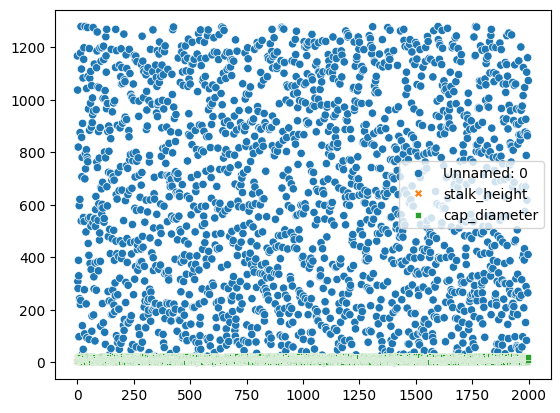

In [50]:
sns.scatterplot(df)

<Axes: xlabel='veil_type', ylabel='class'>

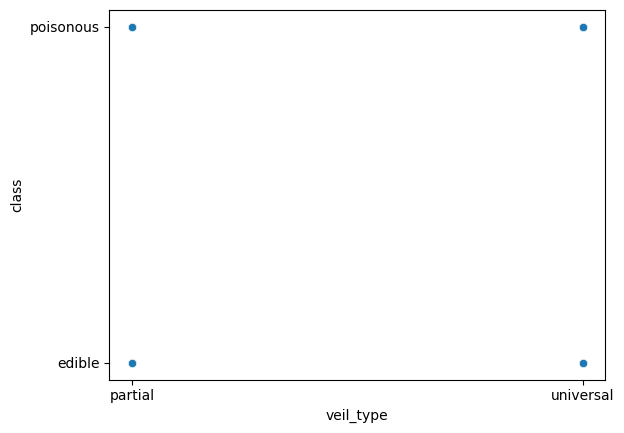

In [51]:
sns.scatterplot(x=df['veil_type'],y=df['class'])

<Axes: xlabel='class', ylabel='veil_type'>

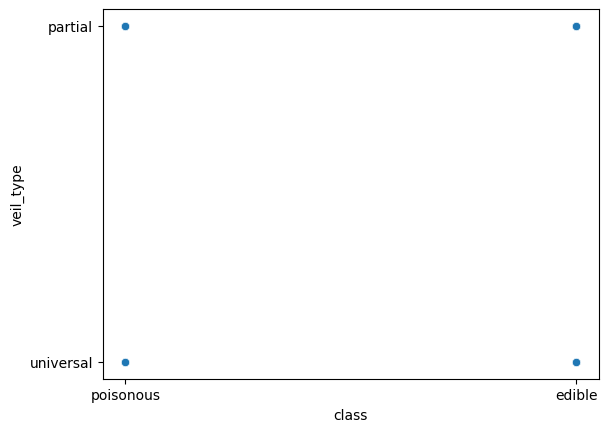

In [52]:
sns.scatterplot(x=df['class'],y=df['veil_type'])

<Axes: xlabel='class', ylabel='cap_shape'>

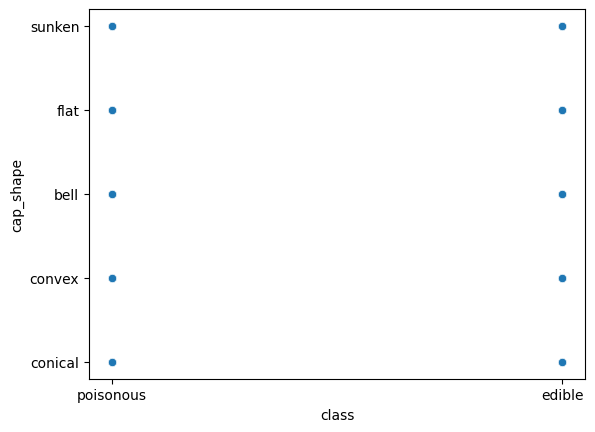

In [53]:
sns.scatterplot(x=df['class'],y=df['cap_shape'])

In [54]:
numeric_df=pd.DataFrame(df.select_dtypes(include='number'))

In [55]:
numeric_df

,Unnamed: 0,stalk_height,cap_diameter
0,1167,14.276173,5.054983
1,1037,3.952715,19.068319
2,309,9.054265,7.205884
3,282,5.226499,20.932692
4,820,14.037532,12.545245
...,...,...,...
1995,863,5.877891,17.464145
1996,1160,6.500840,13.501957
1997,265,13.558064,11.270020
1998,411,11.092703,8.423199


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6071d19610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6071d19b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6071e735c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6071d1a150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6071d1a420>,
 'means': []}

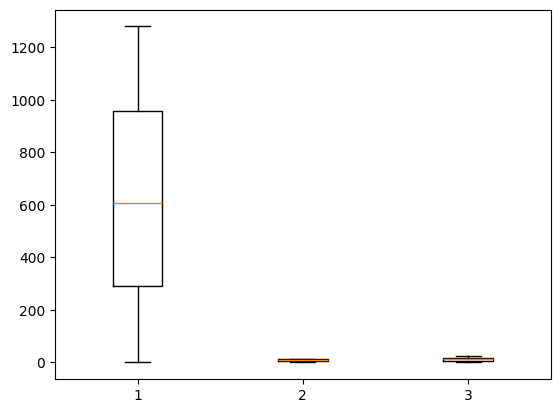

In [56]:
plt.boxplot(numeric_df)#outliers are not present

In [60]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le=LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [62]:
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [69]:
x=df_encoded.drop('class',axis=1)
y=df_encoded['class']

In [70]:
x

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,4,0,1,1,2,6,0,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,4,0,2,1,7,8,2,5,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,6,0,0,2,1,8,0,6,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,5,1,3,1,0,1,5,6,11.092703,8.423199


In [71]:
y

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


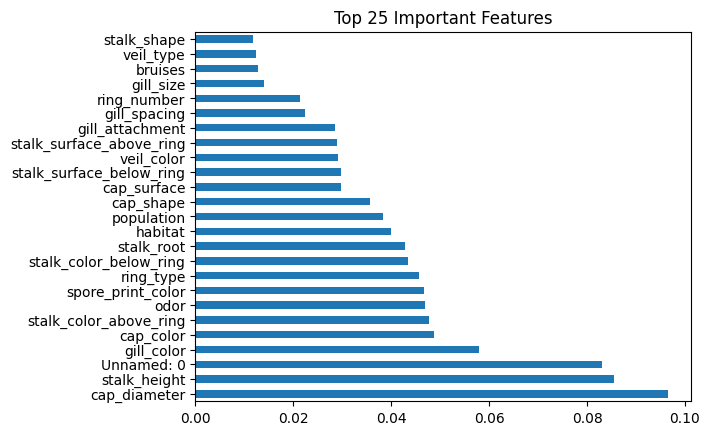

In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x, y)

importances = pd.Series(model.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(25).plot(kind='barh')
plt.title("Top 25 Important Features")
plt.show()

In [81]:
sorted_importances=importances.sort_values(ascending=False)

In [87]:
top_features = sorted_importances.head(15).index
print("Top 15 Important Features:\n", top_features)

Top 15 Important Features:
 Index(['cap_diameter', 'stalk_height', 'Unnamed: 0', 'gill_color', 'cap_color',
       'stalk_color_above_ring', 'odor', 'spore_print_color', 'ring_type',
       'stalk_color_below_ring', 'stalk_root', 'habitat', 'population',
       'cap_shape', 'cap_surface'],
      dtype='object')


In [88]:
X_top = x[top_features]

In [89]:
X_top

,cap_diameter,stalk_height,Unnamed: 0,gill_color,cap_color,stalk_color_above_ring,odor,spore_print_color,ring_type,stalk_color_below_ring,stalk_root,habitat,population,cap_shape,cap_surface
0,5.054983,14.276173,1167,7,7,3,1,3,6,8,2,5,1,4,2
1,19.068319,3.952715,1037,3,6,2,1,1,6,0,6,5,2,4,0
2,7.205884,9.054265,309,8,5,8,4,6,6,3,2,5,0,3,1
3,20.932692,5.226499,282,6,4,8,3,4,0,5,1,0,1,0,2
4,12.545245,14.037532,820,6,8,3,5,8,4,7,4,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17.464145,5.877891,863,3,0,5,4,6,2,4,0,1,0,4,2
1996,13.501957,6.500840,1160,9,5,5,5,8,7,4,5,5,2,4,2
1997,11.270020,13.558064,265,7,3,0,3,8,1,6,4,6,0,2,1
1998,8.423199,11.092703,411,6,7,3,7,1,0,5,6,6,5,0,3


In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_top[['Unnamed: 0','stalk_height','cap_diameter']]=sc.fit_transform(X_top[['Unnamed: 0','stalk_height','cap_diameter']])

/tmp/ipython-input-3491971955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top[['Unnamed: 0','stalk_height','cap_diameter']]=sc.fit_transform(X_top[['Unnamed: 0','stalk_height','cap_diameter']])


In [98]:
X_top

,cap_diameter,stalk_height,Unnamed: 0,gill_color,cap_color,stalk_color_above_ring,odor,spore_print_color,ring_type,stalk_color_below_ring,stalk_root,habitat,population,cap_shape,cap_surface
0,-1.030123,1.576459,1.445410,7,7,3,1,3,6,8,2,5,1,4,2
1,0.958407,-1.216463,1.098741,3,6,2,1,1,6,0,6,5,2,4,0
2,-0.724904,0.163717,-0.842601,8,5,8,4,6,6,3,2,5,0,3,1
3,1.222967,-0.871852,-0.914602,6,4,8,3,4,0,5,1,0,1,0,2
4,0.032765,1.511897,0.520072,6,8,3,5,8,4,7,4,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.730771,-0.695623,0.634739,3,0,5,4,6,2,4,0,1,0,4,2
1996,0.168525,-0.527090,1.426743,9,5,5,5,8,7,4,5,5,2,4,2
1997,-0.148193,1.382181,-0.959935,7,3,0,3,8,1,6,4,6,0,2,1
1998,-0.552164,0.715199,-0.570600,6,7,3,7,1,0,5,6,6,5,0,3


In [99]:
x=X_top.iloc[:,:]
y=df_encoded['class']

In [100]:
x

,cap_diameter,stalk_height,Unnamed: 0,gill_color,cap_color,stalk_color_above_ring,odor,spore_print_color,ring_type,stalk_color_below_ring,stalk_root,habitat,population,cap_shape,cap_surface
0,-1.030123,1.576459,1.445410,7,7,3,1,3,6,8,2,5,1,4,2
1,0.958407,-1.216463,1.098741,3,6,2,1,1,6,0,6,5,2,4,0
2,-0.724904,0.163717,-0.842601,8,5,8,4,6,6,3,2,5,0,3,1
3,1.222967,-0.871852,-0.914602,6,4,8,3,4,0,5,1,0,1,0,2
4,0.032765,1.511897,0.520072,6,8,3,5,8,4,7,4,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.730771,-0.695623,0.634739,3,0,5,4,6,2,4,0,1,0,4,2
1996,0.168525,-0.527090,1.426743,9,5,5,5,8,7,4,5,5,2,4,2
1997,-0.148193,1.382181,-0.959935,7,3,0,3,8,1,6,4,6,0,2,1
1998,-0.552164,0.715199,-0.570600,6,7,3,7,1,0,5,6,6,5,0,3


In [101]:
y

,class
0,1
1,0
2,1
3,1
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=42)

In [105]:
svc = SVC(kernel='rbf',gamma=0.01)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy= ",acc)
# confusion_matrix(y_test,y_pred)

Accuracy=  70.83333333333334


In [106]:
kfold = KFold(n_splits=10)

In [107]:
model_svm = SVC()
# can put ['linear','rbf','poly'], give range for gamma i.e. C as a regularization parameter. Best out of it will be selected by algorithm. rbf-radial basis function
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.001,0.0001],'C':[1,15,14,13,12,11,10,0.1] }] # 6 X 8 =48 models will be created and will give best out of it.
gsv = GridSearchCV(model_svm,param_grid,cv=kfold)
gsv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [108]:
gsv.best_params_

{'C': 1, 'gamma': 50, 'kernel': 'rbf'}

In [109]:
gsv.best_score_

np.float64(0.8528571428571429)

# **Using Kernel rbf**

In [110]:
model_svm = SVC(C=1,gamma=50,kernel='rbf') # can change kernel and check accuracy
model_svm.fit(x_train , y_train) #build model
y_pred = model_svm.predict(x_test)#predict on test dataset

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

Accuracy = 88.16666666666667


# **Using Kernel Linear**

In [111]:
model_svm = SVC(C=1,gamma=50,kernel='linear') # can change kernel and check accuracy
model_svm.fit(x_train , y_train) #build model
y_pred = model_svm.predict(x_test)#predict on test dataset

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

Accuracy = 69.16666666666667


# **Using Kernel Polynomial**

In [113]:
model_svm = SVC(C=1,gamma=50,kernel='poly') # can change kernel and check accuracy
model_svm.fit(x_train , y_train) #build model
y_pred = model_svm.predict(x_test)#predict on test dataset

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

Accuracy = 84.0


# **1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

using Kernel rbf model got very good accuracy as 88.16%
using kernel polynomial model got little less accuracy than rbf as 84.0%
using kernel linear model got moderate accuracy as 69.16

so the conclusion is using the kernel rbf model got very good accuracy

# **2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

The dataset provided for the SVM model building consists of 26 columns and 2000 rows.

the dataset features consists of majority of Categorical columns so i've done LabelEncoding on those columns.

using all the 26 features model is not going to give good accuracy so i have done some dimensionality reduction using randomforestClassifier, this algorithm has provided me the importance of features in predicting the type of mushroom, So i've choosed top 15 features amongst the all features for the SVM model Building.

Later i built the model with random C value, gamma value and kernel, in which model got 70.83% accuracy. that is not good enough accuracy.

So, i've done some hyperparameter tuning using grid Search Algorithm. Randomly i have choosen the list of c values and gamma values and kernel as[rbf,linear, poly...]. So gridSearch Algorithm has done some internal calculations and provided the best score and best parameters for model building.

So, i had chosen those best_parameters and built the model again. later model got very good accuracy of 88%.

using the boxplot visualization i got an idea about presence of outliers, so i found there are no any outliers are present in the mushroom dataset. this is the very ideal dataset.

# **3. Discuss practical implications of SVM in real-world classification tasks.**

Support Vector Machines (SVM) are widely used in real-world classification problems due to their ability to handle complex, high-dimensional data and produce accurate results even with limited samples.

**1. Text and Document Classification**

Use Case: Email spam detection, sentiment analysis, and topic categorization.

Reason: Text data is high-dimensional (many words/features), and SVM works efficiently in such spaces using kernel functions.

Example: Classifying emails as spam or not spam based on word frequency vectors.

**2. Medical Diagnosis**

Use Case: Disease prediction like cancer detection (e.g., classifying tumors as malignant or benign).

Reason: SVM performs well on small, labeled medical datasets where accurate decision boundaries are crucial.
